In [ ]:
import pandas as pd
import sklearn as sk

Substitua `dataset_link` pelo dataset de sua escolha

In [46]:
# Usa o dataset 'segmentation'
#'http://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.data'
# O link acima não pode ser usado pois falta o CLASS no header, e também é necessário apagar os comentários
dataset_link = './segmentation.data'

# Carrega o dataset para um DataFrame do Pandas
df = pd.read_csv(dataset_link)

# Renomeia a coluna que será usada para a classificação
df.rename(columns={0: 'CLASS'}, inplace=True)

# Impime as primeiras linhas para verificação
df.head()

,CLASS,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


Remova as colunas que não deseja passando o indice delas para `drop` (use a váriavel boleana e a array para remover as colunas)

In [47]:
# Marca se os dados devem ser normalizados ou não
drop_col = False
cols_to_drop = [0]

# Remove colunas do DataFrame pois elas não são úteis ao modelo
if drop_col:
  df = df.drop(cols_to_drop, axis=1)

# Impime as primeiras linhas para verificação
df.head()

,CLASS,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


Separa a coluna que vai servir para a classificação, passe o índice dela considerando as colunas que já fora dropadas

In [48]:
# Separa a "classe" do resto do DataFrame
y = df[['CLASS']]

# Impime as primeiras linhas para verificação
y.head()

,CLASS
0,BRICKFACE
1,BRICKFACE
2,BRICKFACE
3,BRICKFACE
4,BRICKFACE


Remove a coluna que foi separada para ser a "classe"

In [49]:
# Remove a coluna "class" que foi separada, mantendo somente as features
X = df.drop(['CLASS'], axis = 1)

# Impime as primeiras linhas para verificação
X.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


Faz o pré-processamento dos dados necessários como por exemplo a normalização (marque as variáveis como true para fazer o pré-processamento)

In [50]:
from sklearn import preprocessing

# Marca se os dados devem ser normalizados ou não
normalize = False

# Faz a normalização dos dados se necessário
if normalize:
  min_max_scaler = preprocessing.MinMaxScaler()
  X_normalized = min_max_scaler.fit_transform(X)
  X = pd.DataFrame(X_normalized)

# Impime as primeiras linhas para verificação
X.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


Cria a árvore de decisão e faz o 10-fold cross-validation

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# Cria a árvore de decisão
dt = DecisionTreeClassifier(min_impurity_decrease=0.00)

# Faz a 10-fold cross-validation
scores = cross_validate(dt, X, y, cv=10, return_estimator=True)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2)) # 95% confidence

Accuracy: 0.89 (+/- 0.07)


Mostra a melhor arvore de decisão na tela, lembre de substituir o nome das classes

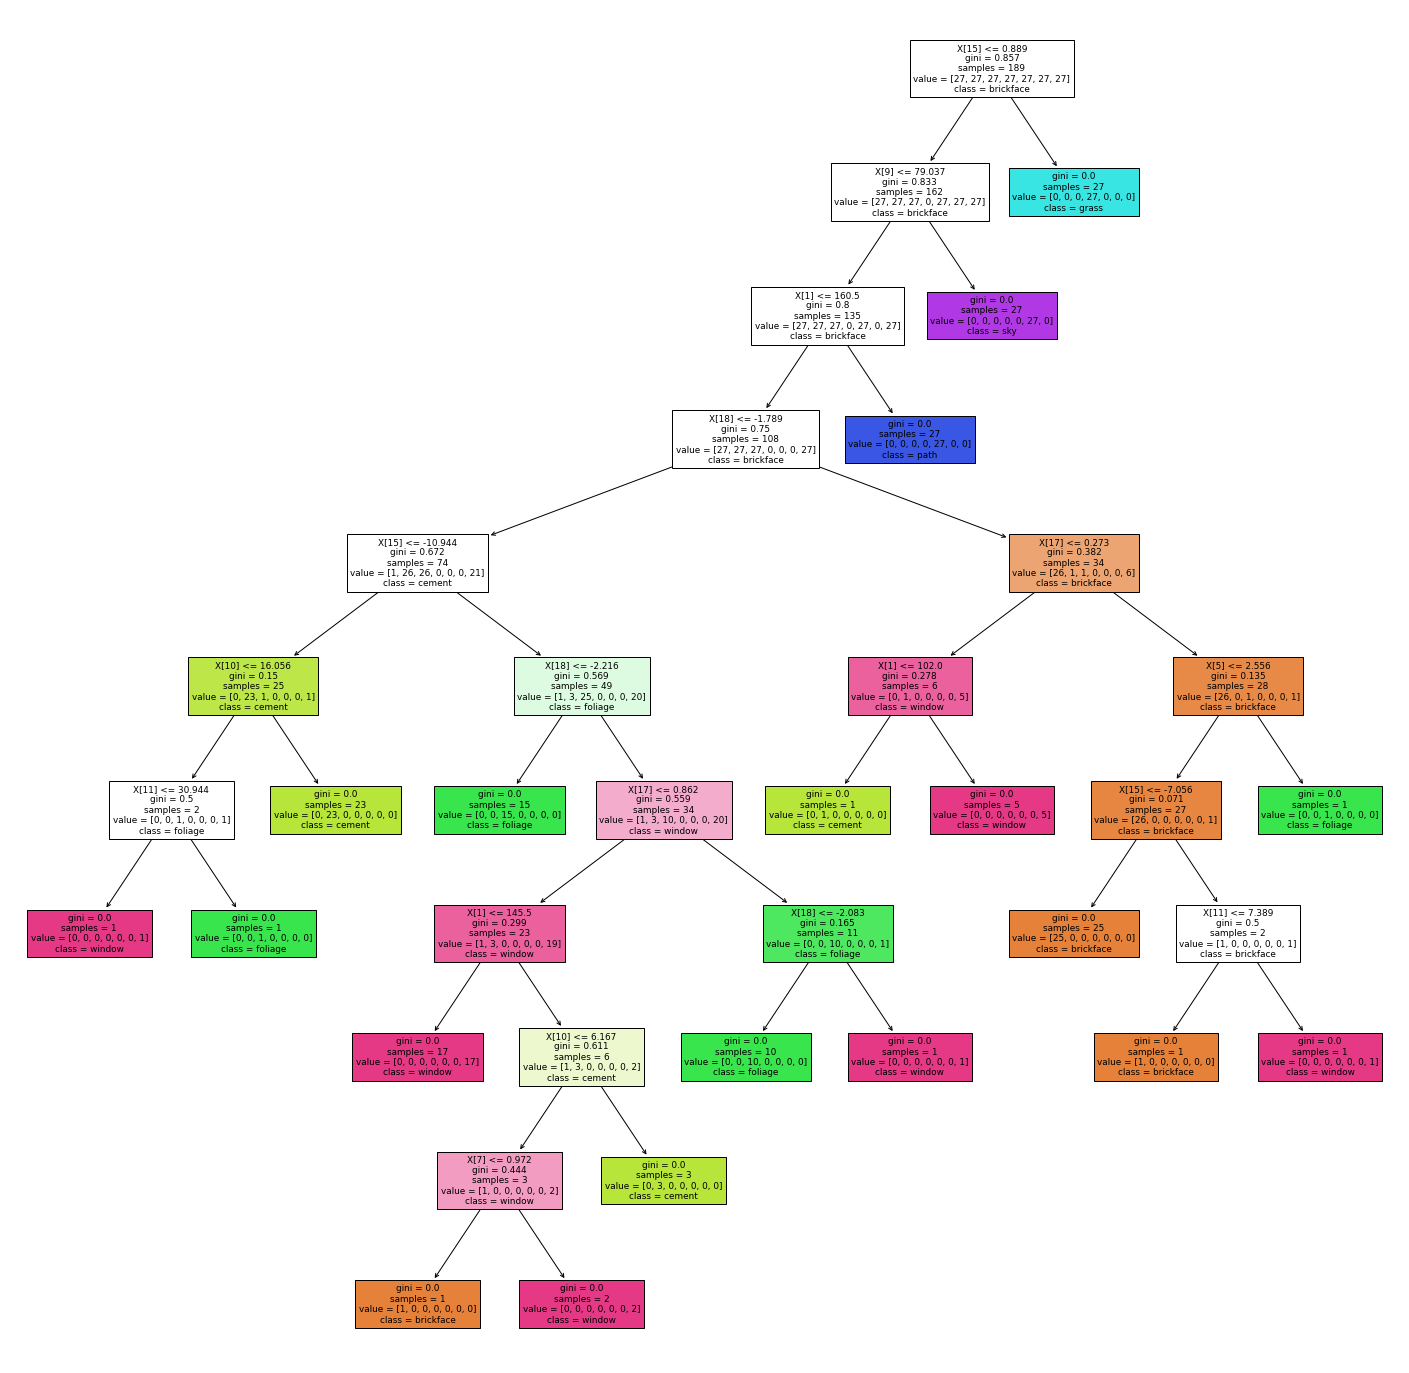

In [54]:
import matplotlib.pyplot as plt
from sklearn import tree

# Mostra a melhor árvore de decisão
max_score = scores['test_score'].max()
for i in range(len(scores['test_score'])):
  if scores['test_score'][i] == max_score:
    best_dt = scores['estimator'][i]

# Exibe a árvore
cn=['brickface', 'cement', 'foliage', 'grass', 'path', 'sky', 'window']
fig, ax = plt.subplots(figsize=(25, 25)) 
tree.plot_tree(best_dt, class_names=cn, filled = True);
plt.show()